# Regression

def : a Stastistical aproach to establish the relationship among variables

Basically two ways of trainin gany regression model:

- `using a direct equation from`  **closed-from equation**
- `using iterative optimization approach` (e.g gradient decent , sgd,etc)

## Linear Regression
example,you are building ML model to identify `whether money makes people happy or not?`
 [OECD is better life index](https://stats.oecd.org/index.aspx?DataSetCode=BLI) and [GDP per capital](https://www.imf.org/external/pubs/ft/weo/2016/01/weodata/weorept.aspx?pr.x=32&pr.y=8&sy=2015&ey=2015&scsm=1&ssd=1&sort=country&ds=.&br=1&c=512,668,914,672,612,946,614,137,311,962,213,674,911,676,193,548,122,556,912,678,313,181,419,867,513,682,316,684,913,273,124,868,339,921,638,948,514,943,218,686,963,688,616,518,223,728,516,558,918,138,748,196,618,278,624,692,522,694,622,142,156,449,626,564,628,565,228,283,924,853,233,288,632,293,636,566,634,964,238,182,662,453,960,968,423,922,935,714,128,862,611,135,321,716,243,456,248,722,469,942,253,718,642,724,643,576,939,936,644,961,819,813,172,199,132,733,646,184,648,524,915,361,134,362,652,364,174,732,328,366,258,734,656,144,654,146,336,463,263,528,268,923,532,738,944,578,176,537,534,742,536,866,429,369,433,744,178,186,436,925,136,869,343,746,158,926,439,466,916,112,664,111,826,298,542,927,967,846,443,299,917,582,544,474,941,754,446,698,666&s=NGDPDPC&grp=0&a)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# loading the dataset
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [6]:
# some data cleaning and preprocessing
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [7]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

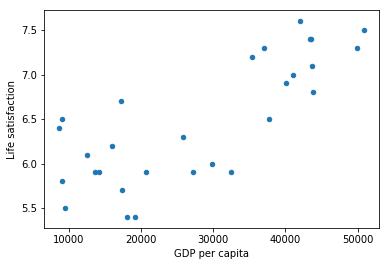

In [8]:
# plot it out
import matplotlib.pyplot as plt

country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction")
plt.show()

general equation for any straight line y = c + mx

$$life_satisfaction=\theta_{θ}+\theta_{1}∗GDP\_per\_capita$$
 
where  $\theta_{θ}$  and  $\theta_{θ}$  are our ML model's parameters (i.e., Life satisfaction & GDP per capita)

**how to measure the performance for this ML model that we'll build?**

## cost function / utility function / fitness function
for most regression, the cost function is usually the measure of distance b/w the predicted value and the actual value.

various ways to evaluate the performance of a model:

**Root Mean Squared Error (RMSE)** RMSE basically gives an idea of how much the error your ML system is making in its prediction.
$$RMSE(X,f)=\sqrt{\frac{1}{m}\sum_{i=1}^m(f(x^i)−y^i)^2}$$

where m : total no. of instances
f: hypothesis function/Model prediction function
f(x): predicted value after going through prediction function
y: actual target value
$x^i :  i^{th}$  element of the feature vector x

**Mean Squared Error(MSE)** practically similar to RMSE except for thes square root

**Mean Absolute Error(MAE)** gives you the same idea of how much your predicted values is deviating from the actual values.
`the diffrence is in the way the distances are calculated in RMSE\MSE and MAE`

$$MAE(X,f)=\frac{1}{m}\sum_{i=1}^{m}|f(x^i)-y^i)|$$

RMSE basically uses `Euclidean distance approach`. Also called as `l2 norm of measuring distances`.
MAE uses `Manhattan distance approach`. Also called as `l1 norms of measuring distances`.

There are other higher order norms of measuring these distances and as we go along increasing the norm (something like  $l_k$  norm ) these functions start focusing more on larger values and kind of start ignoring the smaller values

therefore, **RMSE is more sensitive to outliers than MAE**

[NOTE] when we have exponentially less outliers, then even RMSE performs wel

In [16]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
# to get intercept value
t0 = model.intercept_
t0

array([5.38293324])

In [18]:
# to get coefficient values
t1 = model.coef_
t1

array([[3.88236996e-05]])

so for our case, the most optimal parameter would be  $\theta_{0}$=5.3829  and  $\theta_{1}$=3.8823x$10^{-5}$

In [19]:
# predicting life satisfaction given some GDP pe capita value

some_gdp = [[1717]] # GDP per capita of India in 2016
model.predict(some_gdp)

array([[5.44959353]])

## The Normal equation
to find the best value for out  θ  that would minimize the cost function to its least, we use a mathematical approach called The Normal Equation

$$\hatθ=(X^T.X)^{−1}.X^T.y$$
 
where  $\hatθ$ : value that minimizes the cost function<br />
X: feature vector<br />
y: target value<br />

In [20]:
# lets generate some random linear dataset

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100, 1) 

this is basicall,
$$y=4+3x_0+someNoise$$

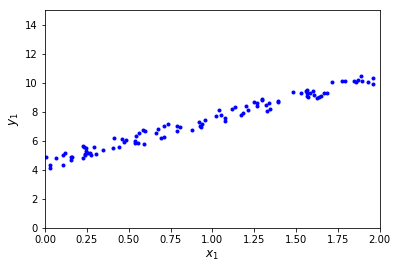

In [23]:
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=12)
plt.ylabel("$y_1$",fontsize=12)
plt.axis([0,2,0,15])
plt.show()

In [25]:
X_b = np.c_[np.ones((100, 1)), X] # adding x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # normal eq.

In [26]:
theta_best

array([[4.47999801],
       [3.02674186]])

In [28]:
X_new= np.array([[0],[1]])
X_new_b= np.c_[np.ones((2,1)),X_new] #adding x0=1 bias to each instance

y_predict= X_new_b.dot(theta_best)
y_predict

array([[4.47999801],
       [7.50673987]])

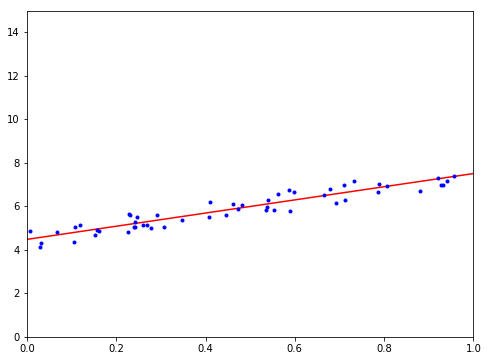

In [31]:
plt.figure(figsize=(8,6))
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 1, 0, 15])
plt.show()

## Gradient Descent:

Gradient Descent is basically generic optimizatio algorithm capable of finding the optimal solution to wide range of problems.

**[story inside it]** the general idea of GD is to tweak your parameters of a model iteratively so as to minimize its cost function.

remember the mountain story [core idea]

**what values shoud  θ  have initially?** well we start out filling int random values for our model parameters. this is also called random initialization

remember the baby steps the man takes to descent down the hill thats what we call **learning rate**

if your learning rate is too small, your model will have to go through many iterations to converge to global minima wherein your cost function is at its least

on the other hand, if you set it out to be a large value, chances are that you jump across the valleys, you might even end up at a point thats higher than the value you had initially, this again will more time to train

ideally people experiment out with diff diff values for the learning rate.

BONUS the MSE is originally a convex function in nature.

TIP if you scale your feature vectors to the same scale, you have chances you reaching the minima for your cost function at the eariest.

## Feature Scaling
[core idea] whenever you have numerical attributes all in diff diff ranges (e.g. 10% - 54%, 0.12 to 0.99. 28 to 34324),
you would want to bring all these numerical attributes onto the same scale. That's when you do feature scaling.

two most common approaches are:

Min-Max Scaling : you shift every numerical attirbute b/w a min and a max range.
Normalization/ Standard Scaling : you subtract every numerical attirbute with its minimum and then yu divide it out unit variance.
$$Z_min−maxscalling=\frac{x−min(x)}{(max(x)−min(x))}$$

```python 
from sklearn.preprocessing import MinMaxScaler
```
$$Z_normalization=\frac{X−μ}{σ}$$
 
```python
from sklearn.preprocessing import StandardScaler
```
where  μ  is mean<br />
X: feature vector<br />
σ  is standard deviation

### Batch Gradient Descent

to implement any GD, we first calculate the gradient of the cost function w.r.t the model parameters  θi 
in other words how much will our cost func change in its magnitude when we slightly change the values  θi .

this is actually achieved through partial derivation of the changes in cost function

$$\frac{\delta}{\deltaθ_j}MSE(θ)=\frac{2}{m}\sum_{i=1}^{m}(\theta^T.x^i−y^i).x^{i}_j$$
 
gradient vector of the cost function

$$\triangledown_θMSE(θ)=\frac{2}{m}X^T.(X.\theta−y)$$
 
this will basically point you to the uphill, but our goal is to descend or reach the minima, therefore, we'll go in the opposite direction of the uphill. Hence, the formula for next gradient descent step will be:

$$θ^{nextstep}=θ−\alpha\triangledown_θMSE(θ)$$
 
where  $\alpha\triangledown_θMSE(θ)$  is your size of the step
α  is learning rate


## Stochastic Gradient Descent
**[core idea]** the problem with BGD, is that it uses the whole training set to compute the gradient at each step, which makes it very slow to train on larger dataset.
SGD just picks some random instance in the training set and then computes the gradient of the cost function at that single instance. so less computation in tweaking our model parameters (bcz this is a tweak just across one instance & not the entire parameters of the entire dataset). Hence its faster at reaching you global minima!

stochastic means random.
SGD more preferred ove BGD

## Mini Batch Gradient Descent
it just grabs a smalled sub-set of the entire dataset (called batch) and then computes the gradient descent for the cost function for this whole batch before moving ahead.

# Polynoial Regression

$$y= ax^2 + bx+c$$ (2 degree polynomial function)

wheneer there is non-linear dataset,you cant straight away fit in a simple linear rule,you then imply polunomial function

In [36]:
np.random.seed(25)

m=100
X=6*np.random.rand(m,1)-3
y=0.5* X**2 + X*2+np.random.randn(m,1) #Quadratic equation

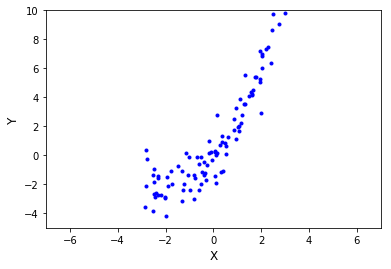

In [37]:
plt.plot(X,y,"b.")
plt.xlabel("X",fontsize=12)
plt.ylabel("Y",fontsize=12)
plt.axis([-7,7,-5,10])
plt.show()

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
poly_features = PolynomialFeatures(degree=2 ,include_bias=False)
X_poly =poly_features.fit_transform(X)

In [40]:
X[0]

array([2.22074482])

In [41]:
X_poly[0]

array([2.22074482, 4.93170755])

In [42]:
lin_reg= LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([-0.19241814]), array([[2.05422149, 0.52955748]]))

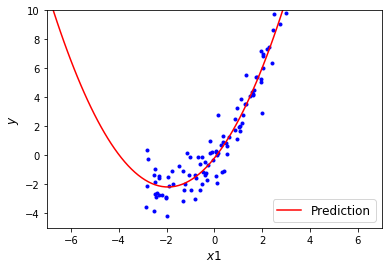

In [44]:
# plot it out

X_new = np.linspace(-7, 7, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", label="Prediction")
plt.xlabel("$x1$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.axis([-7, 7, -5, 10])
plt.legend(loc="lower right", fontsize=12)

plt.show()

In [45]:
from sklearn.linear_model import SGDRegressor
sgd_rg = SGDRegressor(random_state=29)
sgd_rg.fit(X_poly,y)

C:\Users\KINJAL\.conda\envs\py3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\KINJAL\.conda\envs\py3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=29, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [46]:
sgd_rg.intercept_,sgd_rg.coef_

(array([0.00656419]), array([1.96820554, 0.4744187 ]))

In [ ]:
sgd_rg.